In [23]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly
import cufflinks as cf
cf.go_offline()
import warnings 
warnings.filterwarnings('ignore')


from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.svm import SVR,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA

ImportError: cannot import name 'clf' from 'sklearn.metrics' (D:\anaconda\lib\site-packages\sklearn\metrics\__init__.py)

In [5]:
data =pd.read_csv('machine-learning-ex1\ex1\ex1data1.txt',header=None)

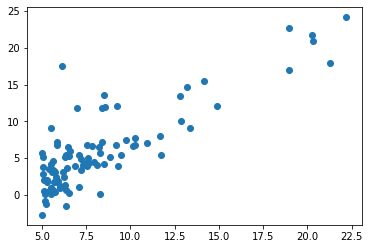

In [136]:
plt.scatter(data[0],data[1])

In [112]:
X=data.iloc[:,0]
y=data.iloc[:,1]
m=len(X)

In [113]:
X=X[:,np.newaxis]
y=y[:,np.newaxis]
theta =np.zeros([2,1])
ones =np.ones((m,1))
X=np.hstack((ones,X))
#accuracy
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.50)

In [114]:
print(X.shape,y.shape,theta.shape)
def costfunction(theta,X,y):
    temp= np.dot(X,theta)-y
    return np.sum(np.power(temp,2))/(2*m)

(97, 2) (97, 1) (2, 1)


In [115]:
costfunction(theta,X_train,y_train)

16.53679471227371

In [116]:
def gradientdescent(theta,X,y,alpha,iterations):
    for _ in range(iterations):
        temp =np.dot(X,theta)-y
        theta=theta-(alpha/m)*np.sum(np.dot(X.T,temp))
        if _ in [200,400,600,800,1000,0]:
            plt.scatter(X[:,1],y)
            plt.plot(X[:,1],np.dot(X,theta))
            plt.show()
    return theta

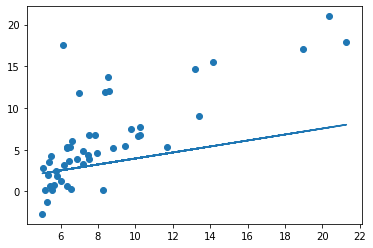

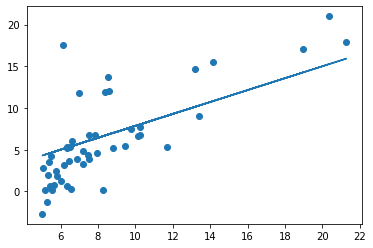

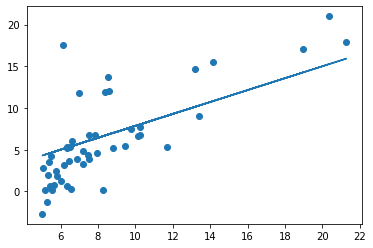

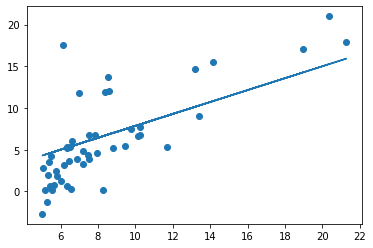

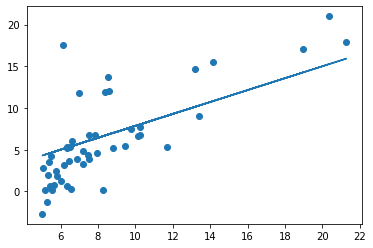

In [117]:
theta=gradientdescent(theta,X_train,y_train,0.01,1000)

In [118]:
costfunction(theta,X_train,y_train)

3.6940175666613335

In [129]:
ac=np.sum(np.power((np.dot(X_test,theta)-y_test),2))
ori=np.sum(np.power((np.dot(y_test,np.mean(y_test))),2))

In [133]:
1-ac/ori

0.9944384242288542

In [137]:
#with multiple variables 
data =pd.read_csv('machine-learning-ex1\ex1\ex1data2.txt',header=None)
data.head()


,0,1,2
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [30]:
X=data.iloc[:,:2]
y=data.iloc[:,-1]
y=y[:,np.newaxis]

In [8]:
X=(X-np.mean(X))/(np.std(X))


In [231]:
m,n=X.shape
theta=np.zeros([n+1,1])
ones=np.ones([m,1])

In [232]:
X=np.hstack((ones,X))

In [233]:
print(X.shape,y.shape,theta.shape)

(47, 3) (47, 1) (3, 1)


In [234]:
def costfunction(theta,X,y):
    m=len(y)
    return np.sum(np.power((np.dot(X,theta)-y),2))/(2*m)

In [235]:
costfunction(theta,X,y)

65591548106.45744

In [243]:
def gradientdescent(theta,X,y,alpha,iterations):
    m=len(y)
    for _ in range(iterations):
        temp=np.dot(X,theta)-y
        temp=(np.dot(X.T,temp))
        theta=theta-((alpha/m)*temp)
    return theta

In [245]:
theta=np.zeros([n+1,1])
alpha=0.01
iters=2500
theta=gradientdescent(theta,X,y,alpha,iters)
print(theta)
print(costfunction(theta,X,y))

[[340412.6595703 ]
 [109446.85156478]
 [ -6577.4099493 ]]
2043280050.9957097


In [247]:
def costfunction(theta,X,y):
    m=len(y)
    return np.sum(np.power((np.dot(X,theta)-y),2))/(2*m)

In [260]:
def gradientdescent(theta,X,y):
        temp=np.dot(X,theta)-y
        temp=(np.dot(X.T,temp))
        return temp
    

In [263]:
#now using scipy
theta=np.zeros([n+1,1])
import scipy.optimize as opt
opt.fmin_tnc(func=costfunction,x0=theta.flatten(),fprime=gradientdescent,args=(X,y.flatten()))

(array([340412.65954146, 109447.79682064,  -6578.35445756]), 77, 4)

array([0., 0., 0.])

In [39]:
#using sklearn

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1)

In [40]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [41]:
lr.predict(X_test)
lr_acc_score= lr.score(X_test,y_test)

In [42]:
lr_acc_score

1.0

In [43]:
y_test

array([[ 1.0463 ],
       [ 3.5129 ],
       [ 7.0467 ],
       [21.767  ],
       [ 0.71618],
       [13.662  ],
       [ 6.7981 ],
       [11.854  ],
       [14.692  ],
       [ 3.6518 ],
       [ 7.7754 ],
       [ 4.2415 ],
       [ 5.3436 ],
       [ 9.0551 ],
       [ 0.152  ],
       [ 4.0259 ],
       [ 2.4756 ],
       [ 3.3411 ],
       [ 1.8396 ],
       [ 3.2522 ],
       [ 0.47953],
       [ 6.7526 ],
       [ 4.8852 ],
       [17.592  ],
       [12.     ],
       [ 0.92695],
       [ 1.8495 ],
       [ 0.29678],
       [ 5.4974 ],
       [ 4.1164 ],
       [ 5.3893 ],
       [ 3.8166 ],
       [ 1.8451 ],
       [24.147  ],
       [ 3.9624 ],
       [ 5.1694 ],
       [ 4.2959 ],
       [ 3.0825 ],
       [ 6.7318 ],
       [ 0.61705],
       [ 7.2029 ],
       [12.134  ],
       [ 0.14454],
       [ 4.3483 ],
       [ 6.5426 ],
       [20.992  ],
       [ 4.6042 ],
       [ 5.3048 ],
       [15.505  ],
       [ 5.7442 ],
       [ 3.3928 ],
       [ 4.263  ],
       [ 3.1